# Experiment 1 - Xgboost

Aim is to get a baseline model running and a prediction output for first kaggle submission.

Need to preprocess the data and save to relevant folder, as well as save model and output file.

Perform some light EDA to get insights about the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

In [2]:
# import dataset - train
training_data = pd.read_csv('../data/raw/train (1).csv')

In [3]:
# inspect the data
training_data.head()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
Id_old         8000 non-null int64
Id             8000 non-null int64
GP             8000 non-null int64
MIN            8000 non-null float64
PTS            8000 non-null float64
FGM            8000 non-null float64
FGA            8000 non-null float64
FG%            8000 non-null float64
3P Made        8000 non-null float64
3PA            8000 non-null float64
3P%            8000 non-null float64
FTM            8000 non-null float64
FTA            8000 non-null float64
FT%            8000 non-null float64
OREB           8000 non-null float64
DREB           8000 non-null float64
REB            8000 non-null float64
AST            8000 non-null float64
STL            8000 non-null float64
BLK            8000 non-null float64
TOV            8000 non-null float64
TARGET_5Yrs    8000 non-null int64
dtypes: float64(18), int64(4)
memory usage: 1.3 MB


In [5]:
training_data.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [6]:
training_data.shape

(8000, 22)

In [7]:
# how many distinct id's are there?
len(training_data.Id.unique())

8000

In [8]:
# check distribution of the target
training_data.TARGET_5Yrs.value_counts()

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64

All variables are numeric, no missing values. Target is the last column, and use Id at column 2, remove column 1.

0 class is underrepresented, ratio about 16% 0, 84% 1

This could affect the power of the model

## Prepare data for model

In [9]:
df_cleaned = training_data.copy()

In [10]:
# remove id_old
df_cleaned.drop('Id_old', axis=1, inplace=True)

In [11]:
df_cleaned.shape

(8000, 21)

In [12]:
# create Y
target = df_cleaned.pop('TARGET_5Yrs')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(df_cleaned, target, test_size=0.2, random_state=8)

### Create the worst base model
Worst case "dumb" model which predicts all 1's. Establish a baseline from which to improve.

In [20]:
# create a vector of all 1's
y_dumb = np.ones(len(y_train), dtype=np.int64)
print(y_dumb.size)
print(y_dumb)

6400
[1 1 1 ... 1 1 1]


In [21]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print(mse(y_train, y_dumb, squared=False))
print(mae(y_train, y_dumb))

0.4096492402043485
0.1678125


In [22]:
from sklearn.metrics import roc_auc_score 

roc=roc_auc_score(y_train, y_dumb)
print("AUC: %.2f%% " % (roc *100))

AUC: 50.00% 


In [23]:
np.save('../data/processed/X_train', X_train)
np.save('../data/processed/X_val',   X_val)
np.save('../data/processed/y_train', y_train)
np.save('../data/processed/y_val',   y_val)

## Train model

Following base model is based off this example https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/ 

In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
from xgboost import XGBClassifier

In [17]:
# instatiate model
model = XGBClassifier()

In [18]:
# fit on train set 
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:25:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Save output to models folder

In [28]:
from joblib import dump

In [29]:
dump(model,  '../models/xgboost.joblib')

['../models/xgboost.joblib']

## Predict

In [19]:
# predict class
y_train_preds = model.predict(X_train)
y_val_preds = model.predict(X_val)

In [20]:
# predict proabilities
y_train_preds_prob = model.predict_proba(X_train)
y_val_preds_prob = model.predict_proba(X_val)

In [21]:
print(y_train_preds_prob)
print(y_val_preds_prob)

[[0.08112586 0.91887414]
 [0.09987664 0.90012336]
 [0.09361494 0.90638506]
 ...
 [0.54095435 0.45904568]
 [0.00101155 0.99898845]
 [0.08491403 0.915086  ]]
[[0.19890362 0.8010964 ]
 [0.4095536  0.5904464 ]
 [0.00859427 0.9914057 ]
 ...
 [0.10229307 0.8977069 ]
 [0.05571914 0.94428086]
 [0.00612676 0.99387324]]


In [22]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [23]:
print(mse(y_train, y_train_preds, squared=False))
print(mae(y_train, y_train_preds))

print(mse(y_val, y_val_preds, squared=False))
print(mae(y_val, y_val_preds))

0.1479019945774904
0.021875
0.4242640687119285
0.18


In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_val_preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.00%


In [25]:
from sklearn.metrics import roc_auc_score ,recall_score, precision_score

In [26]:
precision=precision_score(y_val, y_val_preds)
recall=recall_score(y_val, y_val_preds)
roc=roc_auc_score(y_val, y_val_preds)
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))

Precision: 84.50% 
Recall: 96.20% 
AUC: 51.99% 


In [27]:
roc_auc_score(y_train, y_train_preds_prob[:,1])

0.9991608573520434

In [28]:
roc_auc_score(y_val, y_val_preds_prob[:,1])

0.6414207115146704

Plot roc curve using code from here https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ 

In [30]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_val, y_val_preds_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

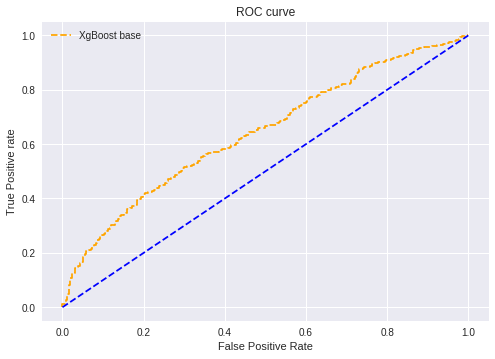

In [32]:
# use matplotlib to plot ROC curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='XgBoost base')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

In [50]:
# predict on test set
test_data = pd.read_csv('../data/raw/test (1).csv')

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 21 columns):
Id_old     3799 non-null int64
Id         3799 non-null int64
GP         3799 non-null int64
MIN        3799 non-null float64
PTS        3799 non-null float64
FGM        3799 non-null float64
FGA        3799 non-null float64
FG%        3799 non-null float64
3P Made    3799 non-null float64
3PA        3799 non-null float64
3P%        3799 non-null float64
FTM        3799 non-null float64
FTA        3799 non-null float64
FT%        3799 non-null float64
OREB       3799 non-null float64
DREB       3799 non-null float64
REB        3799 non-null float64
AST        3799 non-null float64
STL        3799 non-null float64
BLK        3799 non-null float64
TOV        3799 non-null float64
dtypes: float64(18), int64(3)
memory usage: 623.4 KB


In [55]:
# remove old Id
test_cleaned = test_data.copy()

In [56]:
test_cleaned = test_cleaned.drop('Id_old', axis=1, inplace=True)


KeyError: "['Id_old'] not found in axis"

In [57]:
test_cleaned

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,3794,84,21.2,8.7,3.4,6.7,50.2,0.0,0.0,-4.5,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,3795,49,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,3796,53,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,3797,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [58]:
y_test_preds = model.predict(test_cleaned)
y_test_preds_prob = model.predict_proba(test_cleaned)

In [59]:
print(y_test_preds)
print(y_test_preds_prob)

[1 1 1 ... 1 1 1]
[[0.04393959 0.9560604 ]
 [0.1116221  0.8883779 ]
 [0.00557256 0.99442744]
 ...
 [0.32232082 0.6776792 ]
 [0.00147259 0.9985274 ]
 [0.14672917 0.8532708 ]]


In [61]:
y_test_preds.sum()

3677

They are not all 1's, hooray!

In [73]:
# output predictions
id_col = test_cleaned.loc[:,['Id']]

In [84]:
print(id_col)
print(id_col.dtype)

        Id
0        0
1        1
2        2
3        3
4        4
...    ...
3794  3794
3795  3795
3796  3796
3797  3797
3798  3798

[3799 rows x 1 columns]


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [88]:
probabilities = pd.DataFrame(y_test_preds_prob[:,1], columns = ['TARGET_5Yrs'])
print(probabilities)

      TARGET_5Yrs
0        0.956060
1        0.888378
2        0.994427
3        0.995526
4        0.948904
...           ...
3794     0.973556
3795     0.946365
3796     0.677679
3797     0.998527
3798     0.853271

[3799 rows x 1 columns]


In [89]:
# concat columns
output = pd.concat([id_col,probabilities], axis=1)

#df_output = pd.DataFrame(output_list, columns = ['Id','TARGET_5Yrs'])
print(output)

        Id  TARGET_5Yrs
0        0     0.956060
1        1     0.888378
2        2     0.994427
3        3     0.995526
4        4     0.948904
...    ...          ...
3794  3794     0.973556
3795  3795     0.946365
3796  3796     0.677679
3797  3797     0.998527
3798  3798     0.853271

[3799 rows x 2 columns]


In [90]:
# save to csv
output.to_csv('../data/processed/output_xgboostbase.csv',index=False)

# Kaggle AUC = 0.64325